In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Okay, so attaching package dplyr and ggplot2. 
DPLYR -----> a grammar of data manipulation, as quoted from Hadley Wickham. Dplyr has three main function, one of which is to identify the most important data manipulation verbs and make them easy to use from R. Command that can be found in dplyr: mutate (), select (), filter (), summarise () and arrange ().

ggplot2 ----> get into the world of programmatic data visualization. If DPLYR consists the library of a grammar of data manipulation, then ggplot2 will do the grammar of graphics. It has several function as follow:
1. aesthetics or data that will be plotted
2. geometris or the shape of the data (bar plot or scattered graphs, etc)
3. scales or transformation towards the data
4. facets or elements that may be graphed in the same dataset in the same space
5. layers or lay multiple geometris to reveal new information

In [2]:
unlcrimes <- read.csv("Data/unlcrime-2.csv")

import the data

In [3]:
head (unlcrimes)

CaseNo,Incident.Code,Reported,Case.Status,Start.Occurred,End.Occurred,Building,Location,Stolen,Damaged,Description
11000001,NARCOTICS - POSSESSION,2011-01-01T00:10:00,Cleared by Arrest,2011-01-01T00:10:00,,515 N 19th Parking Lot Vine to,515 North 19th St. (GOV'T PARKING LOT (UNL)),NA,NA,UNL student cited and released for Poss of Marijuana < 1 oz and Poss of Drug Paraphernalia after a CSO reported suspicious drug-related activity from a vehicle. 1.2 g of marijuana seized.
11000011,NARCOTICS - POSSESSION,2011-01-01T23:16:00,Cleared by Arrest,2011-01-01T23:16:00,,,N 10TH ST & CHARLESTON ST (STREET),NA,NA,Traffic Stop. Vehicle stopped for a headlight out. Upon contact Officer smelled the strong odor of burnt marijuana. Driver cited/released for Possession of Drug Paraphernalia after a search yielded a pipe with burnt marijuana residue.
11000013,ALCOHOL - MINOR IN POSSESSION,2011-01-02T00:38:00,Cleared by Arrest,2011-01-02T00:38:00,,,N 17TH ST & N ANTELOPE VALLEY PKWY (STREET),NA,NA,Three persons cited for MIPC after being stopped for no headlights at N. Antelope valley parkway and N. 17rh Street.
11000019,TRAFFIC - SUSPENDED DRIVER,2011-01-02T23:24:00,Cleared by Arrest,2011-01-02T23:24:00,,,N 17TH ST & VINE ST (STREET),NA,NA,Non-student cited and lodged in jail for Driving Under Suspension after being stopped for speeding.
11000020,NARCOTICS - POSSESSION,2011-01-03T04:46:00,Cleared by Arrest,2011-01-03T04:46:00,,,N 10TH ST & CHARLESTON ST (STREET),NA,NA,"Non-student stopped for speeding. Officer smelled burnt marijuana from within the vehicle and upon searching located burnt marijuana cigarettes, a pipe, and .6 g of marijuana. Cited and released for Speeding, Poss of Marijuana < 1 oz, and Poss of Drug Paraphernalia."
11000022,MEDICAL EMERGENCY,2011-01-03T10:34:00,Inactive,2011-01-03T10:34:00,,Campus Recreation Center,841 North 14th St (SPORT FACILITIES),NA,NA,UNL affiliated female disoriented in need of medical attention at the Rec Center. Transported to the hospital by LFR.


call out the data and see the overal information in the dataset

In [4]:
unl_reported_crimes <- unlcrimes %>%
  group_by(Incident.Code) %>%
  summarise(
    count = n(),
  ) %>% arrange(desc(count))

since we only want to get the top ten reported crimes to UNLPD so we created new variable called unl_reported_crimes. and we group by or select the Incident.Code (the reported crimes) to be sorted out. to show how many numbers, we do the count things and make it in descending order from largest to smallest ones. 

In [5]:
head (unl_reported_crimes)

Incident.Code,count
ALCOHOL - MINOR IN POSSESSION,1138
MEDICAL EMERGENCY,951
TRAFFIC - SUSPENDED DRIVER,945
NARCOTICS - POSSESSION,877
ALCOHOL - DWI,651
ALCOHOL - DRUNK,634


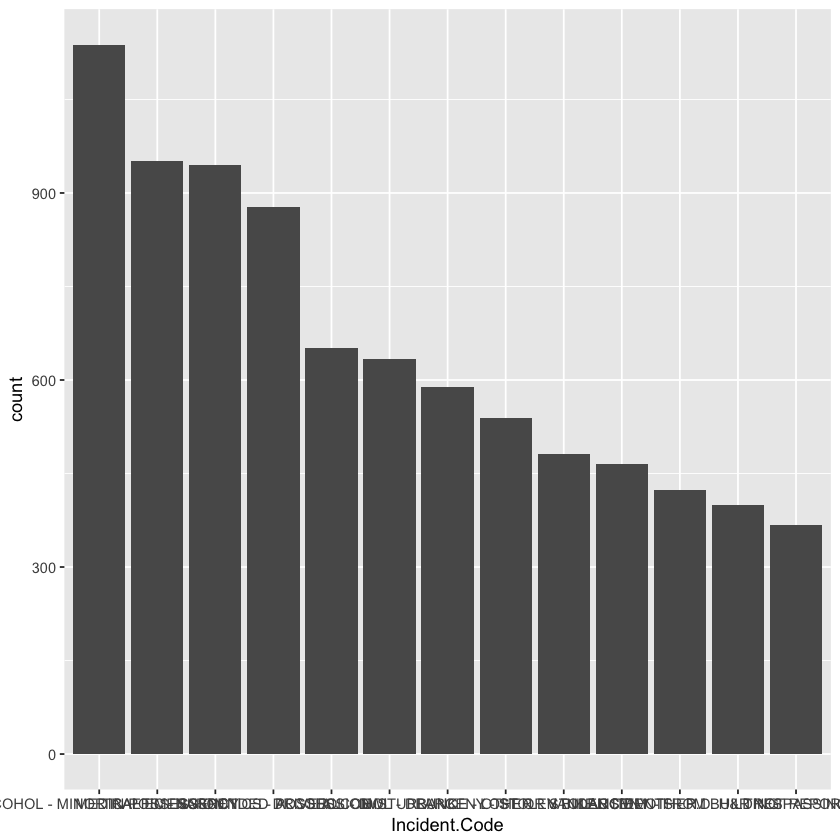

In [6]:
unl_reported_crimes <- unlcrimes %>%
  group_by(Incident.Code) %>%
  summarise(
    count = n(),
  ) %>% arrange(desc(count)) %>%
  filter(count > 300) %>% mutate(Incident.Code = factor(Incident.Code, Incident.Code))
ggplot(unl_reported_crimes, aes(Incident.Code, weight=count)) + geom_bar()

create the graph after count the reported crimes. the same step, use the new variable unl_reported_crimes that has been sorted out, then group by again per Incident.Code, after that count the numbers and make it into largest to smallest order. then sorted out again, since we only want to find the TOP TEN, we limit the graphs into incident.code (reported crimes) which are reported more than 300.  at the end, to create the graphs, call out command with geom_bar:
ggplot(unl_reported_crimes, aes(Incident.Code, weight=count)) + geom_bar()

geom_bar means that we want to use the bar graphics. geometries in ggplot2 refers to call out the shape of the data.

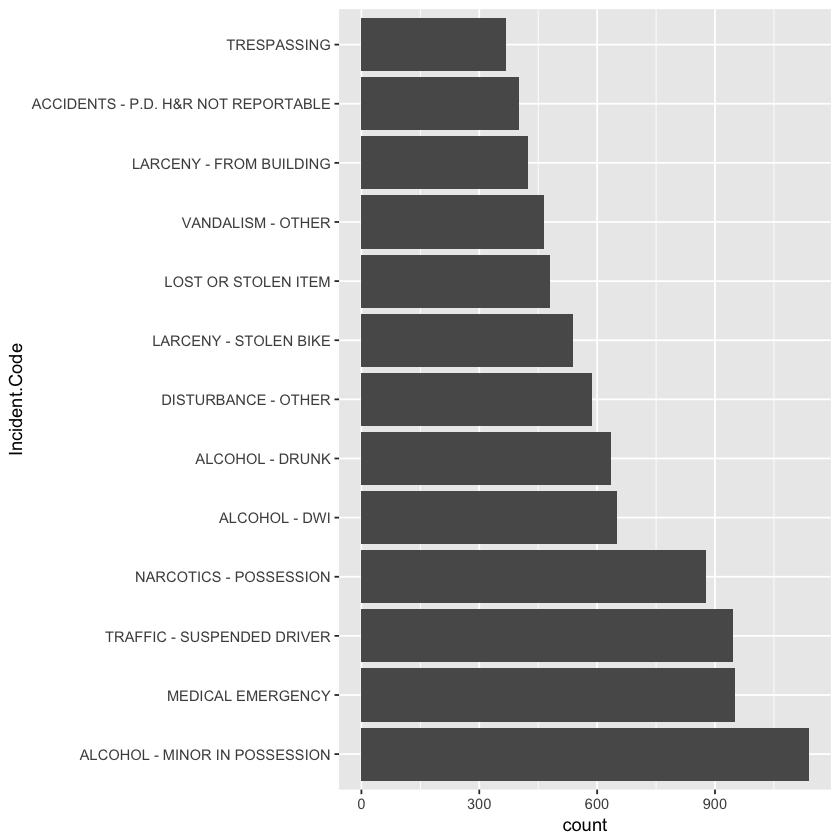

In [7]:
ggplot(unl_reported_crimes, aes(Incident.Code, weight=count)) + geom_bar() + coord_flip()

the graphic before this one will not be too clear to be read. it is because the incident.code (reported crimes) uses long words and they are overlapping one another. So, to be able to read the name of reported crimes, we flip the graph by using the command:

ggplot(unl_reported_crimes, aes(Incident.Code, weight=count)) + geom_bar() + coord_flip()

Therefore, we can know what are the top ten reported crimes to the UNLPD. 

TOP TEN REPORTED CRIME TO UNLPD:

1. ALCOHOL - MINOR IN POSSESSION
2. MEDICAN EMERGENCY
3. TRAFFIC - SUSPENDED DRIVER
4. NARCOTICS - POSSESSION
5. ALCOHOL - DWI
6. ALCOHOL - DRUNK
7. DISTURBANCE - OTHER
8. LARCENY - STOLEN BIKE
9. LOST OR STOLEN ITEMS
10. VANDALISM - OTHER